In [1]:
!pip install --upgrade gensim -q

In [2]:
!pip install nltk

In [3]:
# imports the essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
from textblob import TextBlob
from sklearn.manifold import TSNE
import gensim
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec
import spacy
import string

In [4]:
gensim.__version__

'4.3.2'

In [5]:
import gensim.downloader as api


In [6]:
import re
import random
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from nltk.util import ngrams
from collections import Counter
from collections import Counter, defaultdict


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [7]:
from google.colab import drive
# Mount your Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# Read the dataset from the specified path
df = pd.read_csv('/content/drive/MyDrive/ML Project Dataset/fake_real.csv', sep=',', encoding='utf-8', quotechar='"')


# **Exploratory Data Analysis**

In [9]:
# Display the first few rows of the DataFrame
df.head()

,Unnamed: 0,Content,Title,Type
0,0,new york reuters us environmental group sierra...,politicsNews,true
1,1,washington reuters us air force asked industry...,politicsNews,true
2,2,saturday paul ryan posted photo instagram phot...,News,fake
3,3,america keeps waiting word hillary indicted ob...,politics,fake
4,4,religion peace ht weasel zippers,left-news,fake


In [ ]:
# Display the last few rows of the DataFrame
df.tail()

,Unnamed: 0,Content,Title,Type
44893,44893,new york reuters myanmar national security adv...,worldnews,true
44894,44894,reckless hillary cared less seriousness exposi...,politics,fake
44895,44895,montevideo reuters lucia topolansky uruguay se...,worldnews,true
44896,44896,donald trump getting heavy media coverage late...,News,fake
44897,44897,jakarta reuters indonesian security forces eas...,worldnews,true


In [10]:
# Get the dimensions of the DataFrame (rows, columns)
print("\nDimensions of the DataFrame:")
df.shape


Dimensions of the DataFrame:


(44898, 4)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Content', 'Title', 'Type'], dtype='object')

In [ ]:
# Get a concise summary of the DataFrame including column data types and non-null values
print("\nSummary of the DataFrame:")
df.info()


Summary of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44898 non-null  int64 
 1   Content     44266 non-null  object
 2   Title       44898 non-null  object
 3   Type        44898 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


**Clean the text data**

In [11]:
# Check if the Content column is not of string data type
if df['Content'].dtype != 'object':
    # Convert Content column to string
    df['Content'] = df['Content'].astype(str)
    print("Converted 'Content' column to string data type.")
else:
    print("The 'Content' column is already of string data type.")

The 'Content' column is already of string data type.


In [12]:
# Check for missing values in each column
print("\nMissing values in each column:")
df.isnull().sum()


Missing values in each column:


Unnamed: 0      0
Content       632
Title           0
Type            0
dtype: int64

In [13]:
# Remove rows with missing values
df= df.dropna()

# Fill missing values in 'Content' column with an empty string
df['Content'].fillna('', inplace=True)

# Fill missing values in 'Type' column with the mode
mode_value = df['Type'].mode()[0]
df['Type'].fillna(mode_value, inplace=True)

<ipython-input-13-529fe9219cbb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Content'].fillna('', inplace=True)
<ipython-input-13-529fe9219cbb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type'].fillna(mode_value, inplace=True)


In [14]:
df.isnull().sum()

Unnamed: 0    0
Content       0
Title         0
Type          0
dtype: int64

In [15]:
df['Title'].value_counts()

Title
politicsNews       11271
worldnews          10145
News                9050
politics            6432
left-news           4309
Government News     1498
US_News              783
Middle-east          778
Name: count, dtype: int64

<ipython-input-19-109665f88df8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Title', data=df, palette=custom_palette)


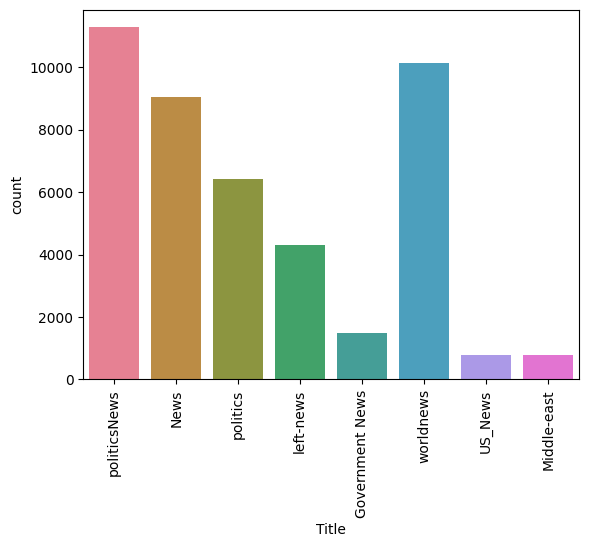

In [ ]:
# Set a custom palette with distinct colors for each title category
custom_palette = sns.color_palette("husl", len(df['Title'].unique()))

# Create a countplot with Seaborn and specify the custom palette
sns.countplot(x='Title', data=df, palette=custom_palette)

# Rotate x-axis labels vertically
plt.xticks(rotation='vertical')

# Show the plot
plt.show()

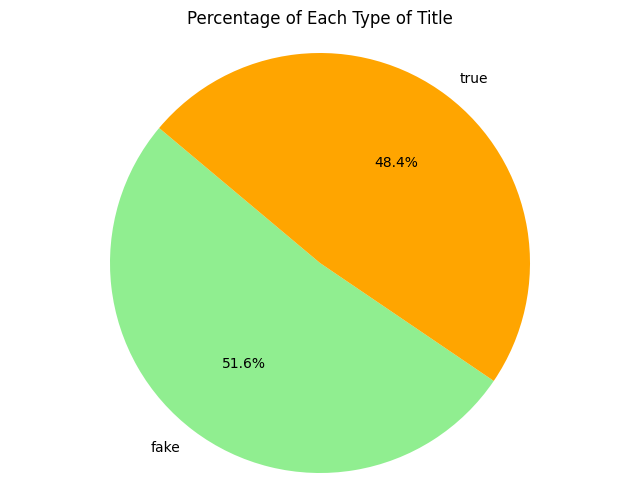

In [ ]:
# Calculate the percentage of each type of title
title_percentage = df['Type'].value_counts(normalize=True) * 100

# Plotting
plt.figure(figsize=(8, 6))
# Define colors for each type of title
colors = ['lightgreen', 'orange']
plt.pie(title_percentage, labels=title_percentage.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Percentage of Each Type of Title')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [ ]:
# Display unique values in the 'type' column
print("\nUnique values in the 'type' column:")
df['Type'].unique()


Unique values in the 'type' column:


array(['true', 'fake'], dtype=object)

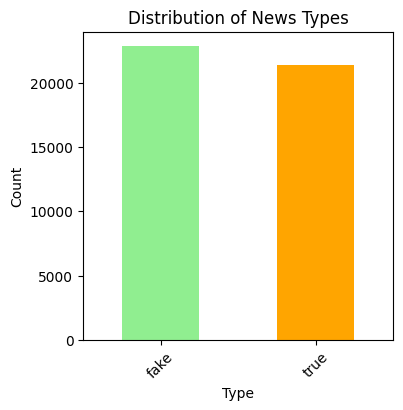

In [ ]:
# Explore unique values in the 'Type' column
type_counts = df['Type'].value_counts()

# Define colors for different types
colors = ['lightgreen', 'orange']

# Plot the counts
plt.figure(figsize=(4, 4))
type_counts.plot(kind='bar', color=colors)
plt.title('Distribution of News Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# **Data Preprocessing:**


In [16]:
# Remove unwanted column (Unnamed: 0)
df.drop('Unnamed: 0', axis=1, inplace=True)

<ipython-input-16-889f391e12fd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Unnamed: 0', axis=1, inplace=True)


In [ ]:
df.head()

,Content,Title,Type
0,new york reuters us environmental group sierra...,politicsNews,true
1,washington reuters us air force asked industry...,politicsNews,true
2,saturday paul ryan posted photo instagram phot...,News,fake
3,america keeps waiting word hillary indicted ob...,politics,fake
4,religion peace ht weasel zippers,left-news,fake


**processing the text data**


In [17]:
def process_Content(text):
    # Function to remove punctuation marks from text
    def remove_punctuation(text):
        punctuation_pattern = r'[^\w\s]'
        cleaned_text = re.sub(punctuation_pattern, '', text)
        return cleaned_text

    # Function to remove special characters and numbers from text
    def remove_special_characters_and_numbers(text):
        special_characters_and_numbers_pattern = r'[^a-zA-Z\s]'
        cleaned_text = re.sub(special_characters_and_numbers_pattern, '', text)
        return cleaned_text

    # Function to remove digits from text
    def remove_digits(text):
        digit_pattern = r'\d+'
        cleaned_text = re.sub(digit_pattern, '', text)
        return cleaned_text

    # Function to convert text to lowercase
    def convert_to_lowercase(text):
        return text.lower()

    # Function to tokenize the text
    def tokenize_text(text):
        return word_tokenize(text)

    # Function to remove stopwords from tokens
    def remove_stopwords(tokens):
        stop_words = set(stopwords.words('english'))
        return [token for token in tokens if token not in stop_words]

    # Initialize the WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()

    # Function to lemmatize tokens
    def lemmatize_tokens(tokens):
        return [lemmatizer.lemmatize(token) for token in tokens]

    # Function to join tokens back into a single string
    def join_tokens(tokens):
        return ' '.join(tokens)

    cleaned_text = remove_punctuation(text)
    cleaned_text = remove_special_characters_and_numbers(cleaned_text)
    cleaned_text = remove_digits(cleaned_text)  # Remove digits
    cleaned_text = convert_to_lowercase(cleaned_text)
    tokens = tokenize_text(cleaned_text)
    tokens = remove_stopwords(tokens)
    tokens = lemmatize_tokens(tokens)
    processed_Content = join_tokens(tokens)

    return processed_Content

# Apply the process_Content function to the 'Content' column
df['Processed_Content'] = df['Content'].apply(process_Content)

# Display the DataFrame after text preprocessing
df.head()

,Content,Title,Type,Processed_Content
0,new york reuters us environmental group sierra...,politicsNews,true,new york reuters u environmental group sierra ...
1,washington reuters us air force asked industry...,politicsNews,true,washington reuters u air force asked industry ...
2,saturday paul ryan posted photo instagram phot...,News,fake,saturday paul ryan posted photo instagram phot...
3,america keeps waiting word hillary indicted ob...,politics,fake,america keep waiting word hillary indicted oba...
4,religion peace ht weasel zippers,left-news,fake,religion peace ht weasel zipper


In [18]:
# Initialize spaCy's English language model
nlp = spacy.load('en_core_web_sm')

In [ ]:
# Define a function to extract features using spaCy
def extract_spacy_features(text):
    # Process the text using spaCy
    doc = nlp(text)

    # Calculate the average word vector for the document excluding stop words
    avg_vector = np.mean([token.vector for token in doc if not token.is_stop], axis=0)
    return avg_vector

# Apply feature extraction using spaCy to the 'Content' column
df['Spacy_Features'] = df['Content'].apply(extract_spacy_features)
df.head()

In [ ]:
# Define a function to extract features using Gensim
def extract_gensim_features(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Build a Word2Vec model
    model = gensim.models.Word2Vec([tokens], min_count=1, size=100)

    # Get the document vector by averaging the word vectors
    doc_vector = np.mean([model[word] for word in tokens], axis=0)
    return doc_vector

# Apply feature extraction using Gensim to the 'Content' column
df['Gensim_Features'] = df['Content'].apply(extract_gensim_features)
df.head()

In [ ]:
# Split the dataset into features (X) and labels (y)
X = np.array(df[['Spacy_Features', 'Gensim_Features']])
y = np.array(df['Type'])

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train your machine learning models (e.g., RandomForestClassifier, SVM, etc.)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)


In [ ]:
# Evaluate the model
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)